In [1]:
import pandas as pd
import numpy as np

In [3]:
wine_data = pd.read_csv('winequality-white.csv', 
                        names = ['Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Residual Sugar','Chlorides', 
                                 'Free Sulfur Dioxide', 'Total Sulfur Dioxide', 'Density', 'PH', 'Sulphates', 'Alcohol', 
                                 'Quality'], 
                        skiprows = 1, sep = r'\s*;\s*', engine = 'python')
wine_data.head()
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fixed Acidity         4898 non-null   float64
 1   Volatile Acidity      4898 non-null   float64
 2   Citric Acid           4898 non-null   float64
 3   Residual Sugar        4898 non-null   float64
 4   Chlorides             4898 non-null   float64
 5   Free Sulfur Dioxide   4898 non-null   float64
 6   Total Sulfur Dioxide  4898 non-null   float64
 7   Density               4898 non-null   float64
 8   PH                    4898 non-null   float64
 9   Sulphates             4898 non-null   float64
 10  Alcohol               4898 non-null   float64
 11  Quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


<AxesSubplot:>

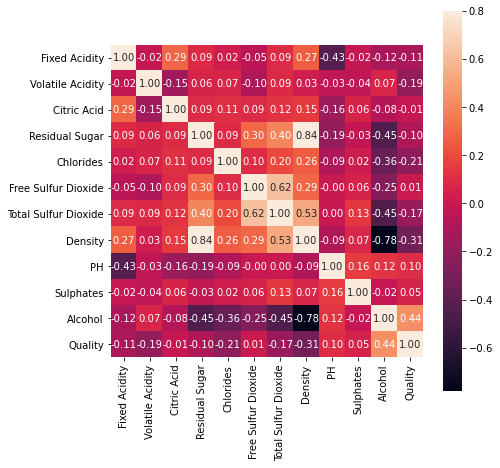

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = wine_data.corr()
f, ax = plt.subplots(figsize = (7, 7))
sns.heatmap(corrmat, vmax = .8, square = True, annot = True, fmt = '.2f')

In [5]:
x = wine_data.drop('Quality', axis=1)
y = wine_data['Quality']

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [7]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier

DecisionTreeClassifier()

In [8]:
classifier.fit (x_train, y_train)

DecisionTreeClassifier()

In [9]:
score = classifier.score(x_test, y_test)
print(score)

0.5744897959183674


In [28]:
y_pred = classifier.predict(x_test)
print(y_pred)

[6 6 4 6 6 5 6 7 5 6 6 7 5 5 6 5 6 5 7 6 5 7 6 5 7 8 6 5 7 6 5 5 6 7 5 6 7
 7 7 6 5 5 5 6 5 6 4 7 7 6 7 6 5 6 4 7 5 6 6 6 5 5 7 6 7 6 6 5 5 5 7 5 5 6
 6 6 6 5 5 6 5 6 5 6 6 6 6 6 6 6 7 7 6 8 6 7 7 5 6 6 6 6 6 7 7 7 6 6 6 5 5
 8 6 6 7 7 5 5 6 6 5 6 5 5 5 7 5 7 5 5 6 6 8 7 5 5 6 7 5 7 5 7 5 6 5 5 7 7
 6 7 7 6 7 7 5 6 5 6 6 7 6 5 7 7 4 6 6 6 5 5 7 7 5 7 6 7 5 5 5 5 6 5 7 7 7
 5 6 6 5 6 6 6 6 7 6 5 6 6 6 6 7 5 4 7 6 6 6 5 7 5 5 8 7 6 6 8 6 6 5 7 6 6
 6 7 6 5 6 4 6 6 5 6 5 4 5 5 7 6 6 5 5 7 7 5 5 7 5 5 6 6 6 5 5 5 7 5 6 5 6
 8 7 6 6 6 5 6 6 6 5 4 6 7 5 6 5 5 7 7 6 5 7 6 5 5 7 6 6 5 6 5 7 7 8 7 5 5
 6 5 6 7 7 6 7 6 6 6 5 6 6 5 6 7 7 6 5 6 6 5 6 6 4 7 6 7 6 6 5 5 5 6 6 7 6
 6 6 6 4 5 5 4 6 6 5 7 6 8 5 6 5 6 6 6 6 6 8 6 5 6 5 7 7 6 7 6 7 5 5 7 5 6
 5 6 6 5 7 5 6 7 7 5 6 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 6 5 5 6 7 8 5 5 7 6 5
 6 5 6 5 6 7 5 6 5 5 7 7 7 7 6 5 5 8 5 6 6 6 7 7 6 6 6 6 6 6 6 7 6 4 5 6 6
 7 7 6 7 7 6 6 6 6 5 5 6 6 6 6 6 6 5 6 6 6 8 5 5 5 6 7 6 5 6 6 6 6 6 7 6 5
 6 7 5 5 6 6 7 5 6 7 5 7 

In [10]:
classifier.n_features_

11

In [11]:
classifier.feature_importances_

array([0.07627657, 0.09551862, 0.07768372, 0.06678276, 0.08568361,
       0.11412681, 0.09039563, 0.0786616 , 0.09315923, 0.08535579,
       0.13635568])

In [13]:
# graphviz can be downloaded @ https://graphviz.gitlab.io/download/
import sklearn.tree as tree
tree.export_graphviz(classifier, out_file ='tree.dot', feature_names=x.columns)


In [14]:
from subprocess import call
call(['dot', '-T', 'png', 'tree.dot', '-o', 'tree.png'])

0

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.359339 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.359339 to fit



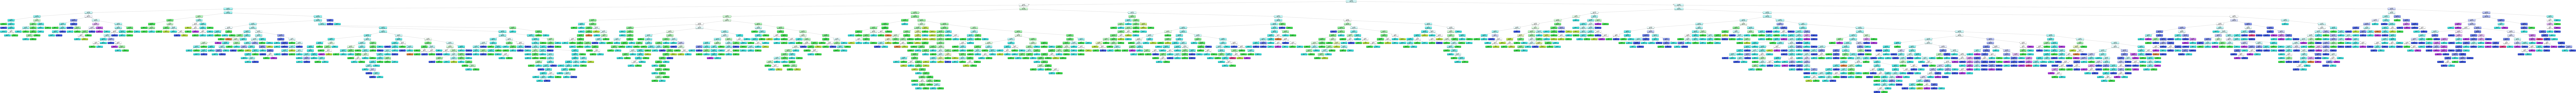

In [15]:
# Graphviz -converts decision tree classifier into dot file
# Pydotplus- convert this dot file to png
from IPython.display import Image 
import pydotplus
from sklearn.tree import export_graphviz
  
import six
import sys
sys.modules['sklearn.externals.six'] = six
from six import StringIO
#import mlrose
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

from IPython.display import Image  
import pydotplus # Pip install pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

In [16]:
classifier_1 = DecisionTreeClassifier(criterion="entropy", max_depth=4)
classifier_1 = classifier_1.fit(x_train,y_train)


In [17]:
from sklearn import metrics
y_pred = classifier_1.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4959183673469388


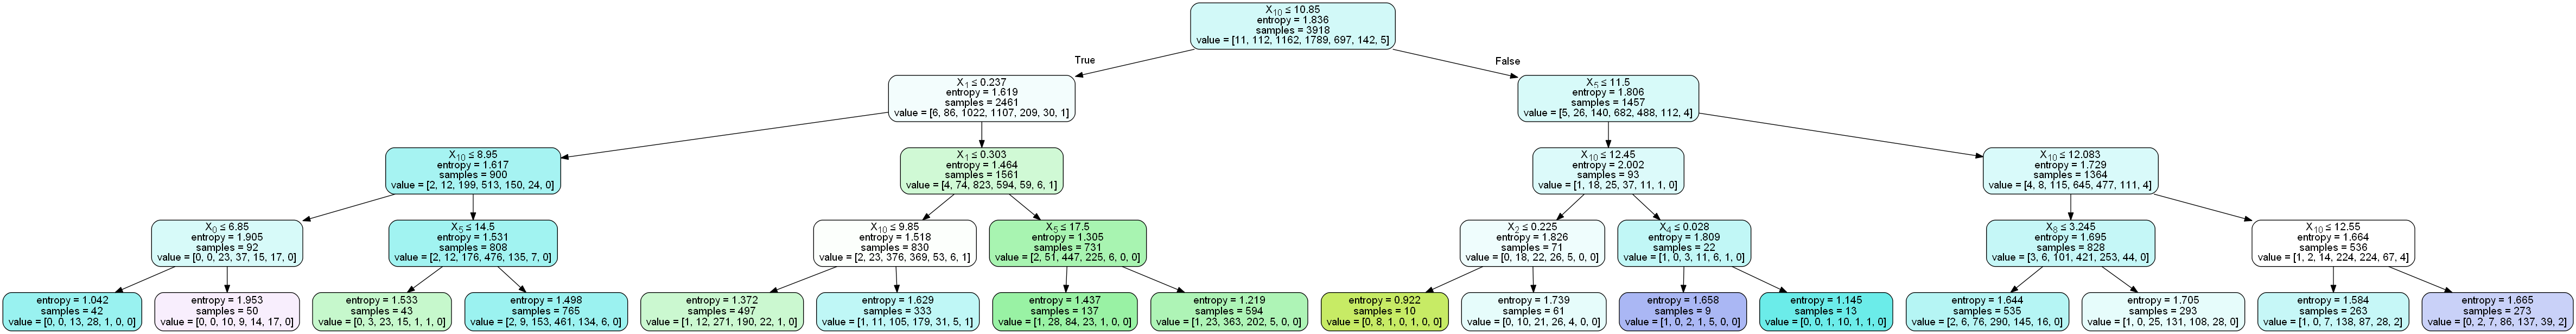

In [18]:
dot_data = StringIO()
export_graphviz(classifier_1, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

In [45]:
# graphviz can be downloaded @ https://graphviz.gitlab.io/download/
import sklearn.tree as tree
tree.export_graphviz(classifier_1, out_file ='tree_1.dot', feature_names=x.columns)
